In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# Defining the emotion labels
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# Defining the image dimensions and number of classes
img_height = 48
img_width = 48
num_classes = 7

# Defining the directories for the training and test data
train_dir = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/FER-2013/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/FER-2013/test'

# Loading the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=64,
    class_mode='sparse'
)

# Loading the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=64,
    class_mode='sparse'
)

# Defining the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# Add a batch normalization layer
model.add(BatchNormalization())
# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Add a second batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a third batch normalization layer
model.add(BatchNormalization())
# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a fourth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a fifth batch normalization layer
model.add(BatchNormalization())
# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a sixth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model.add(Dense(256, activation='relu'))
# Add a seventh batch normalization layer
model.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
model.add(Dense(7, activation='softmax'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="sparse_categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])


print(model.summary())

# # Compiling the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# define the ModelCheckpoint callback to save the model weights after each epoch
checkpoint_callback = ModelCheckpoint('fer2013_model_weights_0.h5', save_weights_only=True, save_best_only=True)

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=50,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size,
    callbacks=[checkpoint_callback]
)

# Evaluating the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print('Test accuracy:', test_acc)

# Saving the model
model.save('fer2013_model_0.h5')
model.save_weights('fer2013_model_weights_0.h5')


Found 3472 images belonging to 7 classes.
Found 802 images belonging to 7 classes.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization_8 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                      

KeyboardInterrupt: ignored

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

# Defining the emotion labels
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# Defining the image dimensions and number of classes
img_height = 48
img_width = 48
num_classes = 7

# Defining the directories for the training and test data
train_dir = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/FER-2013/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/FER-2013/test'

# Loading the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=128,
    class_mode='sparse'
)

# Loading the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=128,
    class_mode='sparse'
)

# Creating an instance of the trained model
model = load_model('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013_model_1.2.h5')

# Load the weights for your model
model.load_weights('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013_model_weights_1.2.h5')

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="sparse_categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])


print(model.summary())

# define the ModelCheckpoint callback to save the model weights after each epoch
checkpoint_callback = ModelCheckpoint('fer2013_model_weights_1.3.h5', save_weights_only=True, save_best_only=True)

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=110,
    initial_epoch=90,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size,
    callbacks=[checkpoint_callback]
)

# Evaluating the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print('Test accuracy:', test_acc)

# Saving the model
model.save('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013_model_1.3.h5')
model.save_weights('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013_model_weights_1.3.h5')


Found 3472 images belonging to 7 classes.
Found 802 images belonging to 7 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization_8 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

# Define constants
num_classes = 7
img_height, img_width = 48, 48
batch_size = 32
epochs = 10

# Defining the directories for the training and test data
train_dir = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/FER-2013/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/FER-2013/test'

# Load FER2013 dataset
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

# Load pre-trained ResNet50 model
base_model = ResNet50(include_top=False, weights='imagenet',
                      input_shape=(img_height, img_width, 3))
for layer in base_model.layers:
    layer.trainable = False

# Add new layers for classification
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)

# Combine base model and new layers
model = keras.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

# define the ModelCheckpoint callback to save the model weights after each epoch
checkpoint_callback = ModelCheckpoint('fer2013_model_weights_res_1.1.h5', save_weights_only=True, save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    verbose=1,
    callbacks=[checkpoint_callback]
    )

# Evaluate the model on the test set
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, verbose=1)

# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013_model_res_1.1.h5')
model.save_weights('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013_model_weights_res_1.1.h5')



Found 2781 images belonging to 7 classes.
Found 691 images belonging to 7 classes.
94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

# Define constants
num_classes = 7
img_height, img_width = 48, 48
batch_size = 32


# Defining the directories for the training and test data
train_dir = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/FER-2013/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/FER-2013/test'

# Load FER2013 dataset
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

# Creating an instance of the trained model
model = load_model('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013_model_res_1.2.h5')

# Load the weights for your model
model.load_weights('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013_model_weights_res_1.2.h5')


model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

# define the ModelCheckpoint callback to save the model weights after each epoch
checkpoint_callback = ModelCheckpoint('fer2013_model_weights_res_1.3.h5', save_weights_only=True, save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=80,
    initial_epoch=40,
    verbose=1,
    callbacks=[checkpoint_callback]
    )

# Evaluate the model on the test set
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, verbose=1)

# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013_model_res_1.3.h5')
model.save_weights('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013_model_weights_res_1.3.h5')

Found 2781 images belonging to 7 classes.
Found 691 images belonging to 7 classes.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
           

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(test_loss, ' ', test_acc)

26/26 [==============================] - 11s 427ms/step - loss: 2.8283 - accuracy: 0.3903
2.8283021450042725   0.390274316072464


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add new trainable layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)


print(model.summary())

# Defining the emotion labels
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# Defining the image dimensions and number of classes
img_height = 48
img_width = 48
num_classes = 7

# Defining the directories for the training and test data
train_dir = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/FER-2013/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/FER-2013/test'

# def grayscale_to_rgb(img):
#     print(img.shape)
#     # Convert grayscale to RGB image
#     img_rgb = tf.tile(img, [1, 1, 3, 1])
#     img_rgb = tf.squeeze(img_rgb, axis=-1)
#     print(img_rgb.shape)
#     return img_rgb


# Load the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # preprocessing_function=grayscale_to_rgb,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    color_mode='rgb',
    batch_size=64,
    class_mode='sparse'
)

# Loading the test data
test_datagen = ImageDataGenerator(
    rescale=1./255,
    # preprocessing_function=grayscale_to_rgb
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    color_mode='rgb',
    batch_size=64,
    class_mode='sparse'
)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



# define the ModelCheckpoint callback to save the model weights after each epoch
checkpoint_callback = ModelCheckpoint('fer2013_model_weights_img_net.h5', save_weights_only=True, save_best_only=True)

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=50,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size,
    callbacks=[checkpoint_callback]
)


# Evaluating the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print('Test accuracy:', test_acc)

# Saving the model
model.save('fer2013_model_img_net.h5')
model.save_weights('fer2013_model_weights_img_net.h5')

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0  

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

# Defining the emotion labels
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# Defining the image dimensions and number of classes
img_height = 48
img_width = 48
num_classes = 7

# Defining the directories for the training and test data
train_dir = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/FER-2013/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/FER-2013/test'

# Loading the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=64,
    class_mode='sparse'
)

# Loading the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=64,
    class_mode='sparse'
)

# Defining the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


# # Creating an instance of the trained model
# model = load_model('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013_model_i.2.h5')

# # Load the weights for your model
# model.load_weights('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013_model_weights_i.2.h5')

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="sparse_categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])


print(model.summary())

# define the ModelCheckpoint callback to save the model weights after each epoch
checkpoint_callback = ModelCheckpoint('fer2013_model_weights_i.1.h5', save_weights_only=True, save_best_only=True)

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=50,
    # initial_epoch=80,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size,
    callbacks=[checkpoint_callback]
)

# Evaluating the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Saving the model
model.save('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013_model_i.1.h5')
model.save_weights('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013_model_weights_i.1.h5')


Found 3472 images belonging to 7 classes.
Found 802 images belonging to 7 classes.


ValueError: ignored

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

# Defining the emotion labels
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# Defining the image dimensions and number of classes
img_height = 48
img_width = 48
num_classes = 7

# Defining the directories for the training and test data
train_dir = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/FER-2013/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/FER-2013/test'

# Loading the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=64,
    class_mode='sparse'
)

# Loading the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=64,
    class_mode='sparse'
)


import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

def objective(params):
    model = Sequential([
        Conv2D(params['filters'], (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(params['filters'] * 2, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(params['filters'] * 2, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(params['filters'] * 2, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dropout(params['dropout']),
        Dense(params['dense_units'], activation='relu'),
        Dropout(params['dropout']),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_generator, validation_data=test_generator, epochs=params['epochs'], callbacks=[early_stopping], verbose=0)

    val_acc = max(history.history['val_accuracy'])

    return {'loss': -val_acc, 'status': STATUS_OK, 'model': model}


space = {
    'filters': hp.choice('filters', [32, 64, 128]),
    'dense_units': hp.choice('dense_units', [128, 256, 512]),
    'dropout': hp.uniform('dropout', 0.2, 0.5),
    'epochs': hp.choice('epochs', [10, 20, 30, 50])
}


best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)


print(best)

Found 3472 images belonging to 7 classes.
Found 802 images belonging to 7 classes.


In [ ]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

def objective(params):
    model = Sequential([
        Conv2D(params['filters'], (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(params['filters'] * 2, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(params['filters'] * 2, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(params['filters'] * 2, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dropout(params['dropout']),
        Dense(params['dense_units'], activation='relu'),
        Dropout(params['dropout']),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_generator, validation_data=test_generator, epochs=params['epochs'], callbacks=[early_stopping], verbose=0)

    val_acc = max(history.history['val_accuracy'])

    return {'loss': -val_acc, 'status': STATUS_OK, 'model': model}


space = {
    'filters': hp.choice('filters', [32, 64, 128]),
    'dense_units': hp.choice('dense_units', [128, 256, 512]),
    'dropout': hp.uniform('dropout', 0.2, 0.5),
    'epochs': hp.choice('epochs', [10, 20, 30, 50])
}


best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)


print(best)


  6%|▌         | 3/50 [2:00:20<31:25:21, 2406.85s/trial, best loss: -0.42518702149391174]


KeyboardInterrupt: ignored

In [ ]:
# Normalizing the dataset
'''
The fer2013new dataset contains the emotion values ranging from - to 10.
Instead, we normalize it to range between 0-1;

'''

import pandas as pd

def clean_data_and_normalize(filename, output_filename):
    # Read data into DataFrame
    df = pd.read_csv(filename)

    # Remove any rows with missing or invalid data
    df.dropna(inplace=True)

    # Separate image names from rest of data
    image_names = df['Image name']
    df = df.drop('Image name', axis=1)

    # Separate Usage from rest of data
    Usage = df['Usage']
    df = df.drop('Usage', axis=1)

    # Convert emotion scores to floats
    df = df.astype(float)

    # Normalize emotion scores for each image
    df = df.div(df.sum(axis=1), axis=0)

    # Add image names back to DataFrame
    df.insert(0, 'Usage', Usage)

    # Add image names back to DataFrame
    df.insert(1, 'Image name', image_names)

    # Save cleaned and normalized data to new CSV file
    df.to_csv(output_filename, index=False)

clean_data_and_normalize('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/fer2013new/fer2013new.csv', 'fer2013new1.csv')

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the paths to the dataset folders and CSV file
train_path = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/fer2013new/FER2013Train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/fer2013new/FER2013Valid'
test_path = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/fer2013new/FER2013Test'
csv_path = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/fer2013new/fer2013new1.csv'
from tensorflow.keras.models import load_model

# Load the CSV file
df = pd.read_csv(csv_path)

# # Remove rows with empty 'Image name' values
# df.dropna(subset=['Image name'], inplace=True)


# Define the parameters for the image data generator
img_width = 48
img_height = 48
batch_size = 64

# Create the image data generator for training data with data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Create the image data generator for validation and test data without data augmentation
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create the generator for loading the training data from the folder
train_generator = train_datagen.flow_from_dataframe(dataframe=df[df['Usage']=='Training'],
                                                    directory=train_path,
                                                    x_col="Image name",
                                                    y_col=["neutral", "happiness", "surprise", "sadness", "anger", "disgust", "fear"],
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    color_mode='grayscale',
                                                    class_mode='raw')

# Create the generator for loading the validation data from the folder
valid_generator = val_test_datagen.flow_from_dataframe(dataframe=df[df['Usage']=='PublicTest'],
                                                        directory=valid_path,
                                                        x_col="Image name",
                                                        y_col=["neutral", "happiness", "surprise", "sadness", "anger", "disgust", "fear"],
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size,
                                                        color_mode='grayscale',
                                                        class_mode='raw')

# Create the generator for loading the test data from the folder
test_generator = val_test_datagen.flow_from_dataframe(dataframe=df[df['Usage']=='PrivateTest'],
                                                       directory=test_path,
                                                       x_col="Image name",
                                                       y_col=["neutral", "happiness", "surprise", "sadness", "anger", "disgust", "fear"],
                                                       target_size=(img_width, img_height),
                                                       batch_size=batch_size,
                                                       color_mode='grayscale',
                                                       class_mode='raw')

# Define the model architecture
num_features = 64
input_shape = (48, 48, 1)
classes = 7

model = Sequential()

# 1st stage
model.add(Conv2D(num_features, kernel_size=(3, 3), input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(num_features, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.5))

# 2nd stage
model.add(Conv2D(num_features, (3, 3), activation='relu'))
model.add(Conv2D(num_features, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd stage
model.add(Conv2D(2 * num_features, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(2 * num_features, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))

# 4th stage
model.add(Conv2D(2 * num_features, (3, 3), activation='relu'))
model.add(Conv2D(2 * num_features, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 5th stage
model.add(Conv2D(4 * num_features, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(4 * num_features, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))

model.add(Flatten())

# Fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(classes, activation='softmax'))

# # Creating an instance of the trained model
# model = load_model('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013n_model_i.1.h5')

# # Load the weights for your model
# model.load_weights('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013n_model_weights_i.1.h5')

#  Compile the model
model.compile(loss=tf.keras.losses.binary_crossentropy,
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
metrics=['accuracy'])

print(model.summary())

# define the ModelCheckpoint callback to save the model weights after each epoch
checkpoint_callback = ModelCheckpoint('fer2013n_model_weights_i.1.h5', save_weights_only=True, save_best_only=True)

#  Define the number of epochs to train the model
epochs = 50

#  Train the model
history = model.fit(train_generator,
          steps_per_epoch=train_generator.n // batch_size,
          epochs=epochs,
          validation_data=valid_generator,
          validation_steps=valid_generator.n // batch_size,
          callbacks=[checkpoint_callback]
          )

#  Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator,
                                     steps=test_generator.n // batch_size)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Saving the model
model.save('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013n_model_i.1.h5')
model.save_weights('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013n_model_weights_i.1.h5')

Found 28501 validated image filenames.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 60 invalid image filename(s) in x_col="Image name". These filename(s) will be ignored.
  warnings.warn(


Found 3579 validated image filenames.
Found 3574 validated image filenames.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 46, 46, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 46, 46, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 44, 44, 64)        36928     
                                                                 
 batch_normalization_7 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                            

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the paths to the dataset folders and CSV file
train_path = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/fer2013new/FER2013Train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/fer2013new/FER2013Valid'
test_path = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/fer2013new/FER2013Test'
csv_path = '/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/fer2013new/fer2013new1.csv'
from tensorflow.keras.models import load_model

# Load the CSV file
df = pd.read_csv(csv_path)

# # Remove rows with empty 'Image name' values
# df.dropna(subset=['Image name'], inplace=True)


# Define the parameters for the image data generator
img_width = 48
img_height = 48
batch_size = 64

# Create the image data generator for training data with data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Create the image data generator for validation and test data without data augmentation
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create the generator for loading the training data from the folder
train_generator = train_datagen.flow_from_dataframe(dataframe=df[df['Usage']=='Training'],
                                                    directory=train_path,
                                                    x_col="Image name",
                                                    y_col=["neutral", "happiness", "surprise", "sadness", "anger", "disgust", "fear"],
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    color_mode='grayscale',
                                                    class_mode='raw')

# Create the generator for loading the validation data from the folder
valid_generator = val_test_datagen.flow_from_dataframe(dataframe=df[df['Usage']=='PublicTest'],
                                                        directory=valid_path,
                                                        x_col="Image name",
                                                        y_col=["neutral", "happiness", "surprise", "sadness", "anger", "disgust", "fear"],
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size,
                                                        color_mode='grayscale',
                                                        class_mode='raw')

# Create the generator for loading the test data from the folder
test_generator = val_test_datagen.flow_from_dataframe(dataframe=df[df['Usage']=='PrivateTest'],
                                                       directory=test_path,
                                                       x_col="Image name",
                                                       y_col=["neutral", "happiness", "surprise", "sadness", "anger", "disgust", "fear"],
                                                       target_size=(img_width, img_height),
                                                       batch_size=batch_size,
                                                       color_mode='grayscale',
                                                       class_mode='raw')

# # Define the model architecture
# num_features = 64
# input_shape = (48, 48, 1)
# classes = 7

# model = Sequential()

# # 1st stage
# model.add(Conv2D(num_features, kernel_size=(3, 3), input_shape=input_shape))
# model.add(BatchNormalization())
# model.add(Activation(activation='relu'))
# model.add(Conv2D(num_features, kernel_size=(3, 3)))
# model.add(BatchNormalization())
# model.add(Activation(activation='relu'))
# model.add(Dropout(0.5))

# # 2nd stage
# model.add(Conv2D(num_features, (3, 3), activation='relu'))
# model.add(Conv2D(num_features, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # 3rd stage
# model.add(Conv2D(2 * num_features, kernel_size=(3, 3)))
# model.add(BatchNormalization())
# model.add(Activation(activation='relu'))
# model.add(Conv2D(2 * num_features, kernel_size=(3, 3)))
# model.add(BatchNormalization())
# model.add(Activation(activation='relu'))

# # 4th stage
# model.add(Conv2D(2 * num_features, (3, 3), activation='relu'))
# model.add(Conv2D(2 * num_features, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # 5th stage
# model.add(Conv2D(4 * num_features, kernel_size=(3, 3)))
# model.add(BatchNormalization())
# model.add(Activation(activation='relu'))
# model.add(Conv2D(4 * num_features, kernel_size=(3, 3)))
# model.add(BatchNormalization())
# model.add(Activation(activation='relu'))

# model.add(Flatten())

# # Fully connected neural networks
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.2))

# model.add(Dense(classes, activation='softmax'))

# Creating an instance of the trained model
model = load_model('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013n_model_i.1.h5')

# Load the weights for your model
model.load_weights('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013n_model_weights_i.1.h5')

#  Compile the model
model.compile(loss=tf.keras.losses.binary_crossentropy,
optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
metrics=['accuracy'])

print(model.summary())

# define the ModelCheckpoint callback to save the model weights after each epoch
checkpoint_callback = ModelCheckpoint('fer2013n_model_weights_i.2.h5', save_weights_only=True, save_best_only=True)

# #  Define the number of epochs to train the model
# epochs = 50

#  Train the model
history = model.fit(train_generator,
          steps_per_epoch=train_generator.n // batch_size,
          epochs=70,
          initial_epoch=50,
          validation_data=valid_generator,
          validation_steps=valid_generator.n // batch_size,
          callbacks=[checkpoint_callback]
          )

#  Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator,
                                     steps=test_generator.n // batch_size)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Saving the model
model.save('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013n_model_i.2.h5')
model.save_weights('/content/drive/MyDrive/Colab Notebooks/NLP - Keerthana mam/Models/fer2013n_model_weights_i.2.h5')

Found 28501 validated image filenames.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 60 invalid image filename(s) in x_col="Image name". These filename(s) will be ignored.
  warnings.warn(


Found 3579 validated image filenames.
Found 3574 validated image filenames.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 46, 46, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 46, 46, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 44, 44, 64)        36928     
                                                                 
 batch_normalization_7 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                            

In [2]:
import cv2
from tensorflow.keras.models import load_model

# Load the image you want to predict
img_path = 'test.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

img_width = 48
img_height = 48

# Resize the image to the same dimensions as the training data
img = cv2.resize(img, (img_width, img_height))

# Reshape the image to match the input shape of the model
img = img.reshape(1, img_width, img_height, 1)

# Normalize the pixel values to be between 0 and 1
img = img / 255.0

model = load_model('Models/fer2013n_model_i.2.h5')

# Predict the emotion probabilities for the image using the trained model
emotions_prob = model.predict(img)

# Print the predicted probabilities for each emotion
print(emotions_prob)


1/1 [==============================] - 33s 33s/step
[[1.5736304e-04 9.9977404e-01 9.3155895e-06 6.4082960e-06 1.9069141e-05
  2.8513588e-05 5.1648449e-06]]


In [5]:
print(emotions_prob[0].tolist())

[0.00015736304339952767, 0.9997740387916565, 9.315589522884693e-06, 6.408296030713245e-06, 1.906914076243993e-05, 2.8513588404166512e-05, 5.164844878891017e-06]


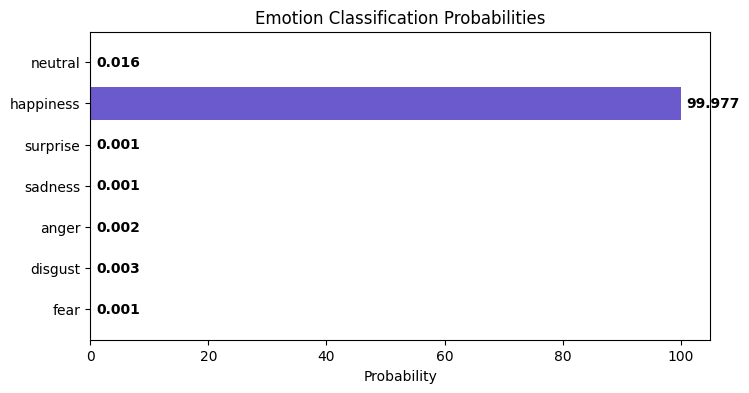

In [17]:
import matplotlib.pyplot as plt
import numpy as np

emotions = ["neutral", "happiness", "surprise", "sadness", "anger", "disgust", "fear"]
emotion_probs = [0.00015736304339952767, 0.9997740387916565, 9.315589522884693e-06, 6.408296030713245e-06, 1.906914076243993e-05, 2.8513588404166512e-05, 5.164844878891017e-06]
emotion_probs = [prob*100 for prob in emotion_probs]

# Set bar color based on emotion
colors = ['#FF5733', '#6A5ACD', '#800000', '#FFFF00', '#A9A9A9', '#1E90FF', '#FFA07A']

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(8,4))
y_pos = np.arange(len(emotions))
ax.barh(y_pos, emotion_probs, align='center', color=colors)
ax.set_yticks(y_pos)
ax.set_yticklabels(emotions)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Probability')
ax.set_title('Emotion Classification Probabilities')

# Add probability values as labels above each bar
for i, prob in enumerate(emotion_probs):
    ax.text(prob+1, i, str(round(prob, 3)), color='black', va='center', fontweight='bold')

plt.show()
